# **Étape 1 : Comprendre le problème**

***1.1 Quel est l'objectif de la présente solution ML?***  

En étudiant le document explicatif, nous comprenons que notre intention est d'aider les créateurs de projets Kickstarter à formuler les facteurs qui augmentent le taux de réussite de leurs campagnes sur la plateforme. Ces insights permettront aux créateurs d'adapter leurs campagnes futures afin de favoriser les chances de succès. 

***1.2 Y a-t-il une solution de prédiction actuellement utilisée?***  

Non. Étant donné que le présent mandat est fictif, nous considérons qu'aucune solution prédictive n'est déployée en ce moment. Il est tout de même important de se poser cette question puisqu'en contexte de mandat réel, elle nous fournit un point de référence en matière de performance et des pistes à explorer pour le développement d'une nouvelle solution ML. 

***1.3 Comment les résultats (output) du présent modèle seront-ils utilisés?***

Avant de se lancer dans la conception du modèle, il est important de comprendre comment les insights tirés à partir des données prédites seront utilisées par les créateurs de campagnes. Pour y parvenir, nous devons nous poser la question suivante: 

- Comment les insights extraits à partir du modèle vont être utilisés par les créateurs de campagnes?

# **Étape 2 : Concevoir un design préalable**

***2.1 S'agit-il d'une solution d'apprentissage machine supervisée, non-supervisée ou d'apprentissage par renforcement?***

Comme nous souhaitons prédire l'état (succès, échec, cancelé etc.) d'une campagne Kickstarter, et que le jeu de données comprend la variable *state*, cela indique que nous optons pour une approche d'apprentissage machine supervisée.

***2.2 De quel type de tâche d'apprentissage machine s'agit-il? (Régression, Classification, Clustering etc.)***

Notre variable indépendante *state* est une variable qualitative nominale, il s'agit donc d'une tâche de classification. 

***2.3 Devons-nous implanter une solution de type batch (offline) learning ou online learning?***

Étant donné que nous disposons de données historiques, de ressources computationnelles adéquates, et que notre objectif est de simplement identifier les facteurs qui améliorent les chances de succès des campagnes Kickstarter, il est justifié d'opter pour une approche hors ligne.

# **Étape 3 : Collecter les données**

Pour ce mandat, nous avons été doté d'un fichier CSV, nommé *ks_datasets.csv*, placé dans le répértoire *Datasets* du présent projet. 

In [61]:
# Importation des bibliothèques os (pour les opérations sur le système de fichiers) et pandas (pour la manipulation de données)
import os
import pandas as pd
import numpy as np

# Définition d'une fonction nommée 'get_file_path' qui prend deux paramètres : 'subdirectory' (sous-répertoire) et 'filename' (nom du fichier)
def get_file_path(subdirectory, filename):
    # La fonction combine le répertoire de travail actuel ('os.getcwd()'), le sous-répertoire et le nom de fichier pour former un chemin complet.
    file_path = os.path.join(os.getcwd(), subdirectory, filename)
    # La fonction retourne le chemin complet résultant.
    return file_path

# Appel de la fonction 'get_file_path' avec les arguments "Datasets" (sous-répertoire) et "ks_dataset.csv" (nom de fichier)
file_path = get_file_path("Datasets", "ks_dataset.csv")

# Utilisation de pandas pour lire un fichier CSV ('file_path') avec un encodage spécifique ('encoding') et en utilisant seulement les premières 13 colonnes ('usecols').
df = pd.read_csv(file_path, 
                        encoding='iso-8859-2',
                        dtype={13:'object',14:'object',15:'object',16:'object'})

# **Étape 4 : Jeter un coup d'oeil à la structure des données et normaliser les données**

À ce stade, les données brutes ont été collectées, mais il est essentiel de comprendre leur nature et leur organisation avant de plonger dans l'analyse proprement dite. À ce étape, nous faisons nos opérations de normalisation de données.

#### **Étape 4.1 : Profilage préalable des métadonnées du jeu de données**

In [62]:
# Affiche les cinq premières lignes du DataFrame 'df'
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [63]:
'''
NOTE : On dénote que plusieurs colonnes ne sont pas dans le format approprié et contiennent des valeurs manquantes (nulls).
Après analyse du jeu de données, nous comprenons que les valeurs non-manquantes des colonnes 13 à 16 sont des observations dont les 
colonnes sont décalées. 
'''

# Affiche des informations sur la structure et le contenu du DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
 13  Unnamed: 13     625 non-null     object
 14  Unnamed: 14     12 non-null      object
 15  Unnamed: 15     4 non-null       object
 16  Unnamed: 16     1 non-null       object
dtypes: int64(1), object(16)
memor

In [64]:
# Crée un nouveau DataFrame vide nommé 'df_clean', qui servira à l'entreposage de données propres.
df_clean = pd.DataFrame()

#### **Étape 4.2 : Profilage et normalisation de la variable ID**

In [65]:
# Fonction pour valider les métadonnées de bases (valeurs manquantes, types de données, valeurs uniques)
def data_profiling(df,column, datatype):
    # Vérifie la présence de valeurs manquantes
    x = df[column].isna().any()
    print(f'Colonne {column}a des valeurs manquantes : {x}')
    # Vérifie la présence de valeurs de type non-conforme
    y = df[column ].apply(lambda x: isinstance(x, datatype)).all()
    print(f'Colonne {column}a seulement des valeurs de type {datatype} : {y}')
    # Vérifie la présence de doublons
    z = df[column].is_unique
    print(f'Colonne {column}a des valeurs uniques : {z}')

# Profile les données dans la colonne ID
data_profiling(df, 'ID ', int)

Colonne ID a des valeurs manquantes : False
Colonne ID a seulement des valeurs de type <class 'int'> : True
Colonne ID a des valeurs uniques : True


In [66]:
'''
NOTE : Comme les identifiants (ID) semblent répondre aux exigences d'une variable ID, nous pouvons l'entreposer dans le df_clean.
'''

df_clean['ID'] = df['ID ']
df_clean.head(1)

,ID
0,1000002330


#### **Étape 4.3 : Profilage et normalisation de la variable Name (variable qualitative nominale)**

In [67]:
# Profile les données dans la colonne name.
data_profiling(df, 'name ', str)

Colonne name a des valeurs manquantes : True
Colonne name a seulement des valeurs de type <class 'str'> : False
Colonne name a des valeurs uniques : False


In [68]:
# Vérifie quels sont les doublons. 3752 doublons de noms. 2 doublons de noms et de dates de lancement. 
duplicates_names = df[df.duplicated(subset=['name '], keep=False)]
print(f'Nombre de doublons de noms : {len(duplicates_names)}')
duplicates_names_launched = df[df.duplicated(subset=['name ','launched '], keep=False)]
print(f'Nombre de doublons de noms et dates de lancement : {len(duplicates_names_launched)}')

'''
NOTE : Les deux doublons de noms et de dates de lancement sont dû au décalage de données. 
Puisqu'aucun doublons de noms/dates de lancement n'est présent, nous assumons qu'il ne s'agit pas de 
doublons approprement dit, mais plutôt de projets qui sont lancés plusieurs fois sur la plateformes. 
'''

Nombre de doublons de noms : 3752
Nombre de doublons de noms et dates de lancement : 2


"\nNOTE : Les deux doublons de noms et de dates de lancement sont dû au décalage de données. \nPuisqu'aucun doublons de noms/dates de lancement n'est présent, nous assumons qu'il ne s'agit pas de \ndoublons approprement dit, mais plutôt de projets qui sont lancés plusieurs fois sur la plateformes. \n"

In [69]:
# Met le texte en minuscule, afin de faciliter le traitement
df_clean['Name'] = df['name '].str.lower()

# Fonction pour le nettoyage de données qualitative nominale.
def string_cleaning(df,column,str_to_delete,bool):
    # Transforme la colonne en string.
    df[column] = df[column].astype(str)
    if bool == 1:
        # Élimine les caractères spéciaux et la ponctuation
        df[column] = df[column].replace([r'[^ a-z0-9]+'], '', regex=True)
        # Élimine les espaces supplémentaires au début, à la fin et entre les mots du nom.
        df[column] = df[column].str.strip().replace(r'\s+', ' ', regex=True)
        # Élimine les espaces supplémentaires au début, à la fin et entre les mots du nom.
        if str_to_delete != None:
            df[column] = df[column].replace(str_to_delete, '', regex=True)
    # Compte le nombre d'observations avec des valeurs manquantes.
    missing_count = len(df[df[column].isin(['',' '])])
    print(f"Nombre d'observations avec des valeurs manquantes : {missing_count}")

string_cleaning(df_clean,'Name',None,1)

'''
NOTE : Les noms de projets nécessitent du nettoyage, alors qu'ils contiennent des caractères spéciaux, une ponctuation inadéquate, 
des espaces inutiles et des mots redondants, tels que 'canceled', 'suspended', 'campaign' etc. Pour ce faire, dans le prochain extrait
de code, nous vérifions les mots les plus fréquents et validons leur pertinence, avant de les retirer au besoin.
'''

Nombre d'observations avec des valeurs manquantes : 1


"\nNOTE : Les noms de projets nécessitent du nettoyage, alors qu'ils contiennent des caractères spéciaux, une ponctuation inadéquate, \ndes espaces inutiles et des mots redondants, tels que 'canceled', 'suspended', 'campaign' etc. Pour ce faire, dans le prochain extrait\nde code, nous vérifions les mots les plus fréquents et validons leur pertinence, avant de les retirer au besoin.\n"

In [70]:
# Récupérer la liste des noms depuis df_transform['Name'].
names = list(df_clean['Name'])

# Initialiser une liste (words) pour stocker les mots et une variable (i) qui sert de compteur.
words = []
i = 0 

# Diviser les noms en mots et les ajouter à la liste 'words'.
while i < len(names):
    new_words = names[i].split()
    words.extend(new_words)
    i += 1

# Créer un dictionnaire vide pour stocker les comptes.
word_count = {}

# Compter les occurrences de chaque élément dans la liste.
for item in words:
    if item in word_count:
        word_count[item] += 1
    else:
        word_count[item] = 1

# Trier le dictionnaire par valeurs en ordre décroissant.
sorted_words = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
sorted_words

{'the': 91447,
 'a': 44644,
 'of': 32710,
 'canceled': 23110,
 'and': 21783,
 'for': 20350,
 'to': 18360,
 'in': 15525,
 'album': 12624,
 'new': 12297,
 'project': 10608,
 'film': 10435,
 'by': 8419,
 'book': 8156,
 'your': 7741,
 'game': 7376,
 'with': 7223,
 'art': 6883,
 'music': 6688,
 'on': 6553,
 'an': 6383,
 'help': 5866,
 'my': 5774,
 'first': 5635,
 'you': 4975,
 'from': 4885,
 'short': 4733,
 'debut': 4499,
 'ep': 4371,
 'life': 4207,
 'is': 4156,
 'documentary': 3875,
 'world': 3854,
 'series': 3799,
 'video': 3611,
 'at': 3453,
 'love': 3453,
 'i': 3368,
 'one': 3255,
 'tour': 3137,
 '1': 2957,
 'story': 2926,
 'novel': 2900,
 '2': 2892,
 'me': 2785,
 'cd': 2759,
 'our': 2601,
 'all': 2583,
 'it': 2566,
 'make': 2554,
 'show': 2549,
 'app': 2545,
 'record': 2499,
 'about': 2411,
 'food': 2361,
 'be': 2245,
 'studio': 2213,
 'that': 2199,
 'get': 2177,
 'cards': 2174,
 'festival': 2161,
 'time': 2153,
 'up': 2131,
 'feature': 2092,
 'card': 2092,
 'movie': 2077,
 'us': 1868,

In [71]:
'''
NOTE : Les mots 'canceled', 'cancelled' et 'suspended' reviennent souvent et ne sont pas pertinents dans le contexte d'un nom de projet.
On peut donc assumer qu'ils sont des erreurs et les retirer. 
'''

# Appel la fonction de nettoyage des données de caractères.
string_cleaning(df_clean,'Name',['canceled','cancelled','cancelled project','suspended'],1)
df_clean.head(1)

Nombre d'observations avec des valeurs manquantes : 42


,ID,Name
0,1000002330,the songs of adelaide abullah


#### **Étape 4.4 : Profilage et normalisation de la variable Category (variable catégorielle)**

In [72]:
# Profile les données dans la colonne category
data_profiling(df, 'category ', str)

Colonne category a des valeurs manquantes : True
Colonne category a seulement des valeurs de type <class 'str'> : False
Colonne category a des valeurs uniques : False


In [73]:
# Fonction qui retrouve les groupes qui sont sous-utilisés
def group_analysis(df, column, cutoff, list_items):
    # Vérifie et crée une liste de groupes qui sont répertoriées dans moins de x (cutoff) nombres d'observations.
    group_count = df[column].value_counts()
    groups_with_low_count = list(group_count[group_count < cutoff].index)
    # Crée une liste d'index qui détiennent les dites catégories à moindre fréquence.
    mask = df[column].isin(groups_with_low_count)
    indexes_to_remove = list(df.index[mask])
    if list_items != None:
        # Crée une liste d'index qui détiennent les dites catégories à moindre fréquence.
        mask = ~df[column].isin(list_items)
        indexes_to_remove = list(df.index[mask])

    return group_count, indexes_to_remove

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'category ', 1000, None)

In [74]:
'''
NOTE : On remarque que, dans 627 observations, les noms de catégories sont simplement des suites de noms de projet qui sont décalés.
Comme nous avons plusieurs colonnes décalées, il est logique de construire une fonction pour ce problème.
'''

# Fonction qui les valeurs de la colonne subséquente à la colonne actuelle.
def replace_cat_values(column, original_col, selected_cutoff, selected_list):
    # Assigne le output de la fonction à deux variables qu'on peut utiliser pour la suite de la fonction. 
    group_count, indexes_to_remove = group_analysis(df, original_col, selected_cutoff, selected_list)
    # Crée la colonne dans le df_clean
    df_clean[column] = df[original_col]
    # Trouve l'index de la colonne
    column_index = df_clean.columns.get_loc(column)
    # Remplace les valeurs des observations décalées par celle de la colonne suivante. 
    df_clean[column] = np.where(df.index.isin(indexes_to_remove), df.iloc[:,column_index+1], df.iloc[:,column_index])

# Assigne les valeurs de la colonne subséquente (main_category) à la colonne actuelle (category).
replace_cat_values('Category','category ', 1000, None)

In [75]:
'''
NOTE : Étape de validation pour les transformations de la colonne Category.
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'Category', 1000, None)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 81


In [76]:
# Transforme toutes les valeurs de la colonne Category en str.
string_cleaning(df_clean,'Category',None,0)
df_clean.head(1)

Nombre d'observations avec des valeurs manquantes : 0


,ID,Name,Category
0,1000002330,the songs of adelaide abullah,Poetry


#### **Étape 4.5 : Profilage et normalisation de la variable MainCategory (variable catégorielle)**

In [77]:
# Profile les données dans la colonne category
data_profiling(df, 'main_category ', str)

Colonne main_category a des valeurs manquantes : False
Colonne main_category a seulement des valeurs de type <class 'str'> : True
Colonne main_category a des valeurs uniques : False


In [78]:
# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'main_category ', 100, None)

In [79]:
# Assigne les valeurs de la colonne subséquente (currency) à la colonne actuelle (main_category).
replace_cat_values('MainCategory','main_category ',100, None)

In [80]:
'''
NOTE : Étape de validation pour les transformations de la colonne MainCategory. 
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'MainCategory', 100, None)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 9


In [81]:
# Transforme toutes les valeurs de la colonne MainCategory en str
string_cleaning(df_clean,'MainCategory',None,0)
df_clean.head(1)

Nombre d'observations avec des valeurs manquantes : 0


,ID,Name,Category,MainCategory
0,1000002330,the songs of adelaide abullah,Poetry,Publishing


#### **Étape 4.6 : Profilage et normalisation de la variable Currency (variable catégorielle)**

In [82]:
# Profile les données dans la colonne currency
data_profiling(df,'currency ',str)

Colonne currency a des valeurs manquantes : False
Colonne currency a seulement des valeurs de type <class 'str'> : True
Colonne currency a des valeurs uniques : False


In [83]:
# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'currency ', 1, None)

# Crée une liste de devises acceptées, à partir des données dans group_count.
list_currencies = ('USD','GBP','CAD','EUR','AUD','SEK','NZD','DKK','NOK','CHF','MXN','SGD','HKD')

# Assigne le output de la fonction group_analysis à deux variables qu'on peut utiliser savoir quels index n'ont pas les devises permises. 
group_count, indexes_to_remove = group_analysis(df, 'currency ', 1, list_currencies)

In [84]:
# Assigne les valeurs de la colonne subséquente (main_category) à la colonne actuelle (currency).
replace_cat_values('Currency','currency ',1,list_currencies)

In [85]:
'''
NOTE : Étape de validation pour les transformations de la colonne Currency. 
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'Currency', 1, list_currencies)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 12


In [86]:
# Transforme toutes les valeurs de la colonne Currency en str
string_cleaning(df_clean,'Currency',None,0)
df_clean.head(1)

Nombre d'observations avec des valeurs manquantes : 0


,ID,Name,Category,MainCategory,Currency
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP


#### **Étape 4.7 : Profilage et normalisation de la variable Deadline (variable temporelle)**

In [87]:
# Profile les données dans la colonne deadline
data_profiling(df,'deadline ', pd.Timestamp)

Colonne deadline a des valeurs manquantes : False
Colonne deadline a seulement des valeurs de type <class 'pandas._libs.tslibs.timestamps.Timestamp'> : False
Colonne deadline a des valeurs uniques : False


In [88]:
'''
NOTE : On remarque que les données de cette colonne ne sont pas enregistré dans un format adéquat.
'''

# Importation de la classe datetime du module datetime.
from datetime import datetime

# Définition de la fonction format_valide pour vérifier le format de la date.
def is_valid_date(date_string):
    try:
        datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

def initial_load_date(column, original_col):
    # Vérifie la validité de la date et remplace les dates invalides par NaN.
    df_clean[column] = df[original_col].apply(lambda x: x if is_valid_date(x) else np.nan)

    # Regarde combien de valeurs n'ont pas le bon format.
    missing_values = df_clean[column].isna().sum()
    print(f"Nombre d'observations avec des valeurs manquantes : {missing_values}")

initial_load_date('Deadline','deadline ')

Nombre d'observations avec des valeurs manquantes : 632


In [89]:
# Définition de la fonction replace_date_values, qui remplace les valeurs manquantes par la valeur de la colonnes suivante. 
def replace_date_values(column):
    # Remplace les valeurs manquantes par celle de la colonne suivante. 
    col_to_replace = df_clean.columns.get_loc(column)
    df_clean[df_clean.columns[col_to_replace]] = df_clean[df_clean.columns[col_to_replace]].fillna(value=df[df.columns[col_to_replace+1]])

    # Change le format de la colone Deadline à datetime 
    df_clean[df_clean.columns[col_to_replace]] = pd.to_datetime(df_clean[df_clean.columns[col_to_replace]], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    # Regarde combien de valeurs n'ont pas le bon format.
    missing_values = df_clean[column].isna().sum()
    print(f"Nombre d'observations avec des valeurs manquantes : {missing_values}")

# Remplace les valeurs manquantes par celle de la colonne suivante pour la colonne Deadline. 
replace_date_values('Deadline')

Nombre d'observations avec des valeurs manquantes : 12


#### **Étape 4.8 : Profilage et normalisation de la variable Goal (variable numérique)**

In [90]:
# Profile les données dans la colonne goal
data_profiling(df,'goal ', float)

Colonne goal a des valeurs manquantes : False
Colonne goal a seulement des valeurs de type <class 'float'> : False
Colonne goal a des valeurs uniques : False


In [91]:
def initial_load_num(column, original_col):
    # Convertit la colonne objectif (goal) en format numérique avec des décimales (float).
    df_clean[column] = pd.to_numeric(df[original_col], errors='coerce')

    # Vérifie combien d'observations se sont fait attribuées la valeur manquante. 632 valeurs manquantes. 
    missing_values = df_clean[column].isna().sum()
    print(f"Nombre d'observations avec des valeurs manquantes : {missing_values}")

initial_load_num('Goal','goal ')

Nombre d'observations avec des valeurs manquantes : 632


In [92]:
def replace_num_values(column):
    # Remplace les valeurs manquantes par celle de la colonne suivante. 
    col_to_replace = df_clean.columns.get_loc(column)
    df_clean[df_clean.columns[col_to_replace]] = df_clean[df_clean.columns[col_to_replace]].fillna(value=df[df.columns[col_to_replace+1]])

    # Convertit la colonne objectif (goal) en format numérique avec des décimales (float)
    df_clean[column] = pd.to_numeric(df_clean[column], errors='coerce')

    # Regarde combien de valeurs n'ont pas le bon format.
    missing_values = df_clean[column].isna().sum()
    print(f"Nombre d'observations avec des valeurs manquantes : {missing_values}")

# Remplace les valeurs manquantes par celle de la colonne suivante pour la colonne Goal. 
replace_num_values('Goal')

Nombre d'observations avec des valeurs manquantes : 12


#### **Étape 4.9 : Profilage et normalisation de la variable Launched (variable temporelle)**

In [93]:
# Profile les données dans la colonne Launched.
data_profiling(df,'launched ', pd.Timestamp)

Colonne launched a des valeurs manquantes : False
Colonne launched a seulement des valeurs de type <class 'pandas._libs.tslibs.timestamps.Timestamp'> : False
Colonne launched a des valeurs uniques : False


In [94]:
# Vérifie la validité de la date et insère une variable Launched en état pré-nettoyage de données.
initial_load_date('Launched', 'launched ')

Nombre d'observations avec des valeurs manquantes : 624


In [95]:
# Remplace les valeurs manquantes par celle de la colonne suivante pour la colonne Launched. 
replace_date_values('Launched')

Nombre d'observations avec des valeurs manquantes : 1


#### **Étape 4.10 : Profilage et normalisation de la variable Pledged (variable numérique)**

In [96]:
# Profile les données dans la colonne pledged.
data_profiling(df,'pledged ', float)

Colonne pledged a des valeurs manquantes : False
Colonne pledged a seulement des valeurs de type <class 'float'> : False
Colonne pledged a des valeurs uniques : False


In [97]:
# Vérifie la validité du format de colonne et insère une variable Pledged en état pré-nettoyage de données.
initial_load_num('Pledged', 'pledged ')

Nombre d'observations avec des valeurs manquantes : 624


In [98]:
# Remplace les valeurs manquantes par celle de la colonne suivante pour la colonne Pledged. 
replace_num_values('Pledged')

Nombre d'observations avec des valeurs manquantes : 1


#### **Étape 4.12 : Profilage et normalisation de la variable State (variable catégorielle)**

In [99]:
# Profile les données dans la colonne pledged.
data_profiling(df,'state ', str)

Colonne state a des valeurs manquantes : False
Colonne state a seulement des valeurs de type <class 'str'> : True
Colonne state a des valeurs uniques : False


In [100]:
# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'state ', 1, None)

# Crée une liste de state accepté. 
list_states = ('failed','successful','canceled','live','undefined','suspended')

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'state ', 1, list_states)

In [101]:
# Assigne les valeurs de la colonne subséquente (backers) à la colonne actuelle (state).
replace_cat_values('State','state ',1,list_states)

In [102]:
'''
NOTE : Étape de validation pour les transformations de la colonne State. 
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'State', 1, list_states)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 12


#### **Étape 4.13 : Profilage et normalisation de la variable Backers (variable numérique)**

In [103]:
# Profile les données dans la colonne backers.
data_profiling(df,'backers ', int)

Colonne backers a des valeurs manquantes : False
Colonne backers a seulement des valeurs de type <class 'int'> : False
Colonne backers a des valeurs uniques : False


In [104]:
# Vérifie la validité du format de colonne et insère une variable Backers en état pré-nettoyage de données.
initial_load_num('Backers', 'backers ')

Nombre d'observations avec des valeurs manquantes : 623


In [105]:
# Remplace les valeurs manquantes par celle de la colonne suivante pour la colonne Backers. 
replace_num_values('Backers')

# Convertit la colonne Backers en format int
df_clean['Backers'] = df_clean['Backers'].astype(int)

Nombre d'observations avec des valeurs manquantes : 0


#### **Étape 4.13 : Profilage et normalisation de la variable Country (variable catégorielle)**

In [106]:
# Profile les données dans la colonne country.
data_profiling(df,'country ', str)

Colonne country a des valeurs manquantes : False
Colonne country a seulement des valeurs de type <class 'str'> : True
Colonne country a des valeurs uniques : False


In [107]:
# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'country ', 1, None)

# Crée une liste de pays accepté. 
list_countries = ('US','GB','CA','AU','DE','NL','FR','IT','ES','SE','NZ','DK','IE','NO','CH','BE','AT','MX','SG','HK')

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df, 'country ', 1, list_countries)

In [108]:
# Assigne les valeurs de la colonne subséquente (usd_pledged) à la colonne actuelle (country).
replace_cat_values('Country','country ',1,list_countries)

In [109]:
'''
NOTE : Étape de validation pour les transformations de la colonne Country. 
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'Country', 1, list_countries)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 3849


In [110]:
'''
NOTE : Nous avons beaucoup de valeurs manquantes, en raison d'une classe mal representée ('N"0'), qui contient beaucoup d'observations, 
mais qui ne figure pas parmi la liste de pays acceptés (list_countries). Une solution que nous pouvons appliquer pour régler ce 
problème est d'inférer le pays, à partir de la devise qui est associée à l'observation. La difficulté avec cette solution est que 
l'EURO est une devise utilisée dans plus qu'un pays.
'''

# Liste de devises et de pays acceptés.
list_currencies = ('USD', 'GBP', 'CAD', 'AUD', 'SEK', 'NZD', 'DKK', 'NOK', 'CHF', 'MXN', 'SGD', 'HKD')
list_countries = ('US', 'GB', 'CA', 'AU', 'SE', 'NZ', 'DK', 'NO', 'CH', 'MX', 'SG', 'HK')

# Crée un dictionnaire de devise-pays.
currency_to_country = dict(zip(list_currencies, list_countries))

# Utilisez le dictionnaire pour remplir les valeurs manquantes de la colonne 'Country'.
df_clean['Country'] = df_clean['Country'].fillna(df_clean['Currency'].map(currency_to_country))

In [111]:
# Crée une liste de pays accepté. 
list_countries = ('US','GB','CA','AU','DE','NL','FR','IT','ES','SE','NZ','DK','IE','NO','CH','BE','AT','MX','SG','HK')

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean, 'Country', 1, list_countries)

# Regarde le nombre de catégorie qui sont toujours mal assignée. 
print(f'Nombre d\'observations dont la catégorie est inadéquate : {len(indexes_to_remove)}')

Nombre d'observations dont la catégorie est inadéquate : 245


#### **Étape 4.14 : Profilage et normalisation de la variable USDPledged (variable numérique)**

In [112]:
# Profile les données dans la colonne usd_pledged.
data_profiling(df,'usd pledged ', float)

Colonne usd pledged a des valeurs manquantes : True


Colonne usd pledged a seulement des valeurs de type <class 'float'> : False
Colonne usd pledged a des valeurs uniques : False


In [113]:
# Vérifie la validité du format de colonne et insère une variable USDPledged.
initial_load_num('USDPledged', 'usd pledged ')

Nombre d'observations avec des valeurs manquantes : 4413


In [114]:
'''
NOTE : La variable USDPledged contient beaucoup de valeurs manquantes et est en fait une redondance d'information inutile. Ce type de
redondance est insouhaitable alors qu'il peut générer l'overfitting du modèle. On peut donc supprimer cette colonne.
'''
try: 
    df_clean.drop(columns='USDPledged', inplace=True)
    print('La colonne USDPledged a été supprimée')
except KeyError:
    print('La colonne USDPledged ne se trouve pas dans le Dataframe')

La colonne USDPledged a été supprimée


# **Étape 5 : Nettoyer les données en traitant les valeurs manquantes et les valeurs abérrantes**

Maintenant que nous avons normalisé les données, nous pouvons procédé au traitement des valeurs manquantes et des valeurs abérrantes. Il est pertinent d'effectuer ces tâches, une à la suite de l'autre, alors que ça permet de suivre la volumétrie et de s'assurer de la qualité des traitements occasionnés. Nous aurions pu également imputer les valeurs manquantes à l'étape de préparation des données pour le ML, mais considérant que nous en avons très peu, nous pouvons simplement les supprimer. 

In [115]:
# Assure que les données sont dans un format adéquat
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            323750 non-null  int64         
 1   Name          323750 non-null  object        
 2   Category      323750 non-null  object        
 3   MainCategory  323750 non-null  object        
 4   Currency      323750 non-null  object        
 5   Deadline      323738 non-null  datetime64[ns]
 6   Goal          323738 non-null  float64       
 7   Launched      323749 non-null  datetime64[ns]
 8   Pledged       323749 non-null  float64       
 9   State         323750 non-null  object        
 10  Backers       323750 non-null  int64         
 11  Country       323564 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 29.6+ MB


In [116]:
# Construit un Dataframe supplémentaire, car puisqu'on fait des suppressions et des transformations, il est pertinent de garder un backup.
df_clean_m = df_clean

#### **Étape 5.1 : Traiter les valeurs manquantes et abérrantes pour la colonne Name**

In [117]:
# Traitement des données manquantes et abérrantes pour la colonne Name

'''
NOTE : Comme nous avions uniquement 42 observations, qui n'ont pas de nom qui leur est attribué, nous pouvons supprimer celles-ci
sans impacter la performance du modèle.
'''

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(df_clean_m[df_clean_m['Name'].isin(['',' '])])}")

# Supprime les données concernées
df_clean_m = df_clean_m[~df_clean_m['Name'].isin(['',' '])]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 42
Volume de données restantes dans le Dataframe : 323708


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB


#### **Étape 5.2 : Traiter les valeurs manquantes et abérrantes pour la colonne Category**

In [118]:
# Traitement des données manquantes et abérrantes pour la colonne Category

'''
NOTE : Nous avions ici, 17 observations qui n'étaient pas classées dans des catégories admises. Nous pouvons également les supprimer.
Une logique similaire est appliquée pour MainCategory.
'''

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean_m, 'Category', 1000, None)

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(indexes_to_remove)}")

# Supprime les observations dont la variable Category n'est pas dans une catégorie admise.
df_clean_m = df_clean_m.drop(indexes_to_remove)

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 86
Volume de données restantes dans le Dataframe : 323622


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB


In [119]:
# Représentation des catégories restantes dans le Dataframe
df_clean_m['Category'].value_counts()

Product Design    17499
Music             16670
Documentary       14918
Food              14096
Film & Video      14032
                  ...  
Photobooks         1210
Plays              1149
Periodicals        1148
Digital Art        1123
Horror             1036
Name: Category, Length: 66, dtype: int64

#### **Étape 5.3 : Traiter les valeurs manquantes et abérrantes pour la colonne MainCategory**

In [120]:
# Traitement des données manquantes et abérrantes pour la colonne MainCategory

# Assigne le output de la fonction à deux variables qu'on peut utiliser pour l'analyse. 
group_count, indexes_to_remove = group_analysis(df_clean_m, 'MainCategory', 100, None)

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(indexes_to_remove)}")

# Supprime les observations dont la variable MainCategory n'est pas dans une catégorie principale admise.
df_clean_m = df_clean_m.drop(indexes_to_remove)

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 0
Volume de données restantes dans le Dataframe : 323622


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB


In [121]:
# Représentation des catégories restantes dans le Dataframe
df_clean_m['MainCategory'].value_counts()

Film & Video    57734
Music           46785
Publishing      34332
Games           28037
Technology      26146
Art             24008
Design          23892
Food            21236
Fashion         18405
Theater          9973
Photography      9680
Comics           8755
Crafts           7187
Journalism       4077
Dance            3375
Name: MainCategory, dtype: int64

#### **Étape 5.4 : Traiter les valeurs manquantes et abérrantes pour la colonne Currency**

In [122]:
# Traitement des données manquantes et abérrantes pour la colonne Currency

# Crée une liste de devises acceptées, à partir des données dans group_count.
list_currencies = ('USD','GBP','CAD','EUR','AUD','SEK','NZD','DKK','NOK','CHF','MXN','SGD','HKD')

# Assigne le output de la fonction group_analysis à deux variables qu'on peut utiliser savoir quels index n'ont pas les devises permises. 
group_count, indexes_to_remove = group_analysis(df_clean_m, 'Currency', 1, list_currencies)

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(indexes_to_remove)}")

# Supprime les observations dont la variable Currency n'est pas dans une catégorie principale admise.
df_clean_m = df_clean_m.drop(indexes_to_remove)

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 0
Volume de données restantes dans le Dataframe : 323622


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB


In [123]:
# Représentation des catégories restantes dans le Dataframe
df_clean_m['Currency'].value_counts()

USD    260719
GBP     28018
CAD     12208
EUR     11562
AUD      6360
SEK      1301
NZD      1164
DKK       841
NOK       540
CHF       478
MXN       214
SGD       120
HKD        97
Name: Currency, dtype: int64

#### **Étape 5.5 : Traiter les valeurs manquantes et abérrantes pour la colonne Deadline**

In [124]:
# Traitement des données manquantes et abérrante pour la colonne Deadline.

'''
NOTE : Comme nous avions uniquement 12 observations, qui n'ont pas de Deadline, nous les supprimons.
'''

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(df_clean_m[df_clean_m['Deadline']==np.nan])}")

# Supprime les observations concernées. 
df_clean_m = df_clean_m[~df_clean_m['Deadline'].isna()]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 0
Volume de données restantes dans le Dataframe : 323622


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB


In [125]:
''' 
NOTE : Dans le cas des dates, il est important de vérifier les minimum et les maximum, afin de comprendre l'étendu de la période 
temporelle et identifier les outliers. Après vérification sur Internet, Kickstarter a été fondé le 28 avril 2009. Alors, rien 
d'inhabituel ici, on peut poursuivre.
'''

print(f"La date la plus récente de Deadline : {df_clean_m['Deadline'].max()}")
print(f"La date la plus ancienne de Deadline : {df_clean_m['Deadline'].min()}")

La date la plus récente de Deadline : 2017-02-04 08:54:55
La date la plus ancienne de Deadline : 2009-05-03 08:59:59


#### **Étape 5.6 : Traiter les valeurs manquantes et abérrantes pour la colonne Goal**

In [126]:
# Traitement des données manquantes et abérrantes pour la colonne Goal.

# Change le display format pour que le output de describe() soit plus interprétable.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Définir des percentiles personnalisés qui peuvent être utiles dans la gestion de valeurs abérrantes. 
custom_percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

# Présente les statistiques descriptives de la colonne Goal.
stats_desc = df_clean_m['Goal'].describe(percentiles=custom_percentiles)
stats_desc

count      323622.00
mean        47124.21
std       1138734.65
min             0.01
5%            400.00
10%           700.00
15%          1000.00
20%          1500.00
25%          2000.00
50%          5000.00
75%         15000.00
80%         20000.00
85%         30000.00
90%         50000.00
95%         85000.00
99%        355943.68
max     100000000.00
Name: Goal, dtype: float64

In [127]:
'''
NOTE : En analysant les statistiques descriptives, ainsi que le boxplot ci-dessous, nous pouvons comprendre que les données de la 
colonne Goal contiennent des données abérrantes. Nous allons les supprimer, tout en faisant attention de ne pas impacter considérablement
la volumétrie. 
'''

# Importe les librairies de visualisation des données. 
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour visualiser les boxplot.
def boxplot_num(data, xaxis_title):
    # Instaure la taille du boxplot
    plt.figure(figsize=(10, 6)) 

    # Éléments de personnalisation du graphique
    sns.boxplot(x=data, color='skyblue', width=0.5) 
    plt.xlabel(xaxis_title) 
    plt.title(f'Boxplot - Distribution de {xaxis_title}') 
    plt.xticks(rotation=45)  

    # Illustre le boxplot
    plt.tight_layout()
    plt.show()

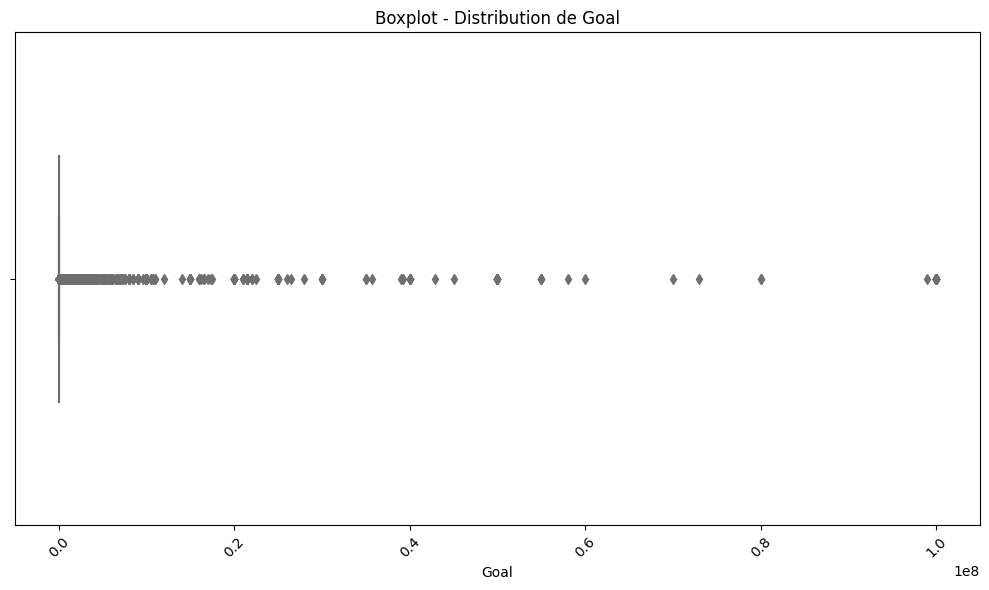

In [128]:
# Représentation du boxplot avant les transformations. 
data = df_clean_m['Goal']
boxplot_num(data, 'Goal')

In [129]:
# Fonction qui output le nombre d'observations qui seront impactées par une suppression au percentile i. 
def nb_rows_to_delete(column):
    for i in ['75%','80%','85%','90%','95%','99%']:
        print(f"Nombre d'éléments à supprimer au percentile {i} : {len(df_clean_m[df_clean_m[column] >= stats_desc[i]])}")
    
# Appel de la fonction pour la colonne Goal. 
nb_rows_to_delete('Goal')

Nombre d'éléments à supprimer au percentile 75% : 91876
Nombre d'éléments à supprimer au percentile 80% : 74002
Nombre d'éléments à supprimer au percentile 85% : 49591
Nombre d'éléments à supprimer au percentile 90% : 32532
Nombre d'éléments à supprimer au percentile 95% : 16328
Nombre d'éléments à supprimer au percentile 99% : 3237


In [130]:
# Suppression des outliers qui sont hors du percentile sélectionné.
df_clean_m = df_clean_m[df_clean_m['Goal'] <= stats_desc['99%']]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Volume de données restantes dans le Dataframe : 320385


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB


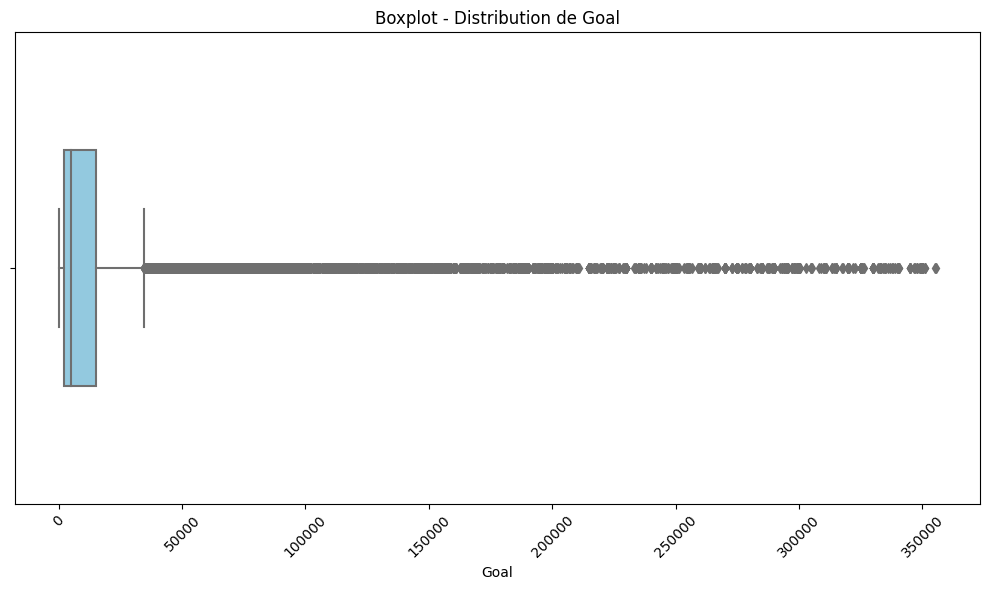

In [131]:
# Représentation du boxplot suivant les transformations. 
data = df_clean_m['Goal']
boxplot_num(data, 'Goal')

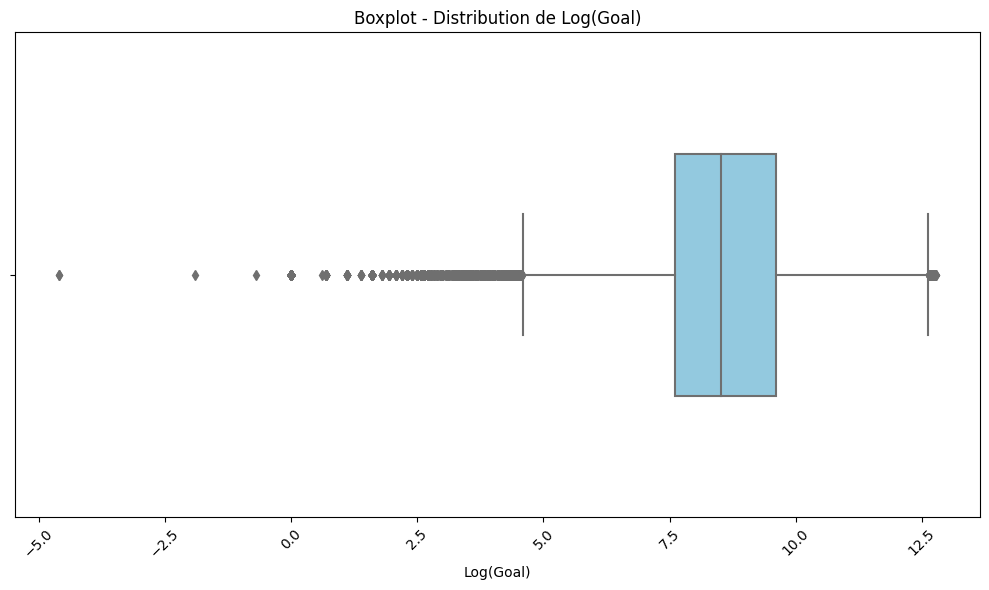

In [132]:
'''
NOTE : En analysant les données restantes, on remarque que même après les transformations, les données contiennent beaucoup de valeurs
abérrante, nous les gardons, mais allons considérer cela lorsqu'il sera temps de sélectionner un modèle ou faire du feature engineering.
Par exemple, en appliquant une transformation logarithmique à cette colonne, on pourrait réduire l'influence des valeurs abérrantes.
'''

# Représentation du boxplot suivant les transformations (Log de la colonne Goal)
data = np.log(df_clean_m['Goal'])
boxplot_num(data, 'Log(Goal)')

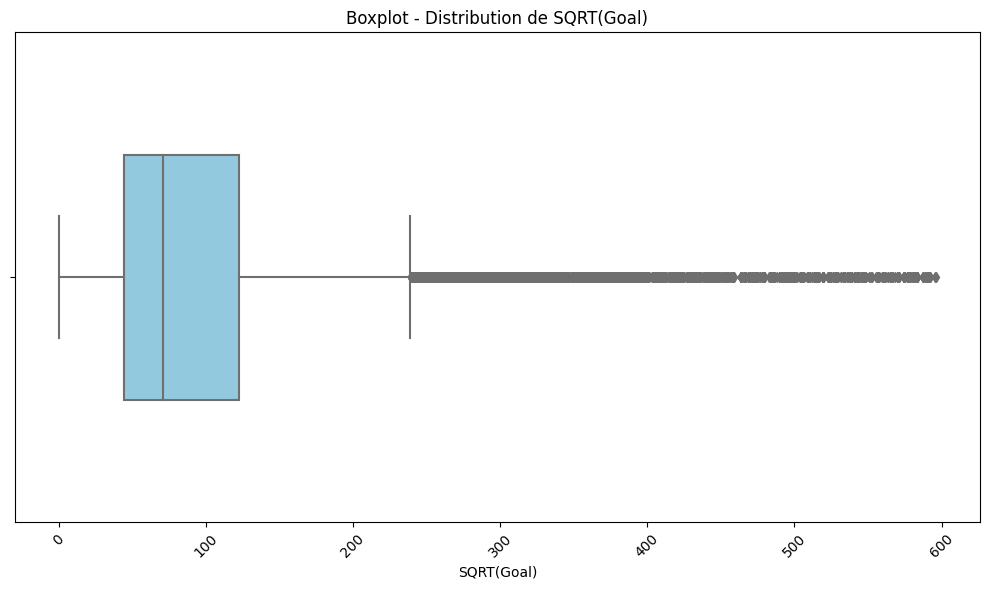

In [133]:
# Représentation du boxplot suivant les transformations (SQRT de la colonne Goal)
data = np.sqrt(df_clean_m['Goal'])
boxplot_num(data, 'SQRT(Goal)')

#### **Étape 5.7 : Traiter les valeurs manquantes et abérrantes pour la colonne Launched**

In [134]:
# Traitement des données manquantes et abérrante pour la colonne Launched.

'''
NOTE : Comme nous avions uniquement 12 observations, qui n'ont pas de Launched date, nous les supprimons.
'''

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(df_clean_m[df_clean_m['Launched']==np.nan])}")

# Supprime les observations concernées. 
df_clean_m = df_clean_m[~df_clean_m['Launched'].isna()]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 0
Volume de données restantes dans le Dataframe : 320385


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB


In [135]:
# On vérifie les valeurs les plus récentes et anciennes de Launched. On remarque des dates en 1970, qui sont abbérantes. 

print(f"La date la plus récente de Launched : {df_clean_m['Launched'].max()}")
print(f"La date la plus ancienne de Launched : {df_clean_m['Launched'].min()}")

La date la plus récente de Launched : 2016-12-06 10:18:31
La date la plus ancienne de Launched : 1970-01-01 01:00:00


In [136]:
# Sachant que Kickstarter a été fondé le 28 avril 2009, toutes les dates avant ça devraient être traitées.

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(df_clean_m[df_clean_m['Launched'] <= '2009-04-28'])}")

# Supprime les observations concernées. 
df_clean_m = df_clean_m[df_clean_m['Launched'] >= '2009-04-28']

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 12
Volume de données restantes dans le Dataframe : 320373


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB


In [137]:
# Vérifie que toute les Launched dates sont après les Deadline dates.
df_clean_m[df_clean_m['Launched'] >= df_clean_m['Deadline']]

,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country


#### **Étape 5.8 : Traiter les valeurs manquantes et abérrantes pour la colonne Pledged**

In [138]:
# Traitement des données manquantes et abérrantes pour la colonne Pledged.

# Présente les statistiques descriptives de la colonne Goal.
stats_desc = df_clean_m['Pledged'].describe(percentiles=custom_percentiles)
stats_desc

count     320373.00
mean        8087.12
std        68534.40
min            0.00
5%             0.00
10%            0.00
15%            1.00
20%           10.00
25%           30.00
50%          621.00
75%         3962.00
80%         5512.33
85%         8147.00
90%        13000.00
95%        26464.00
99%       111423.84
max     13285226.36
Name: Pledged, dtype: float64

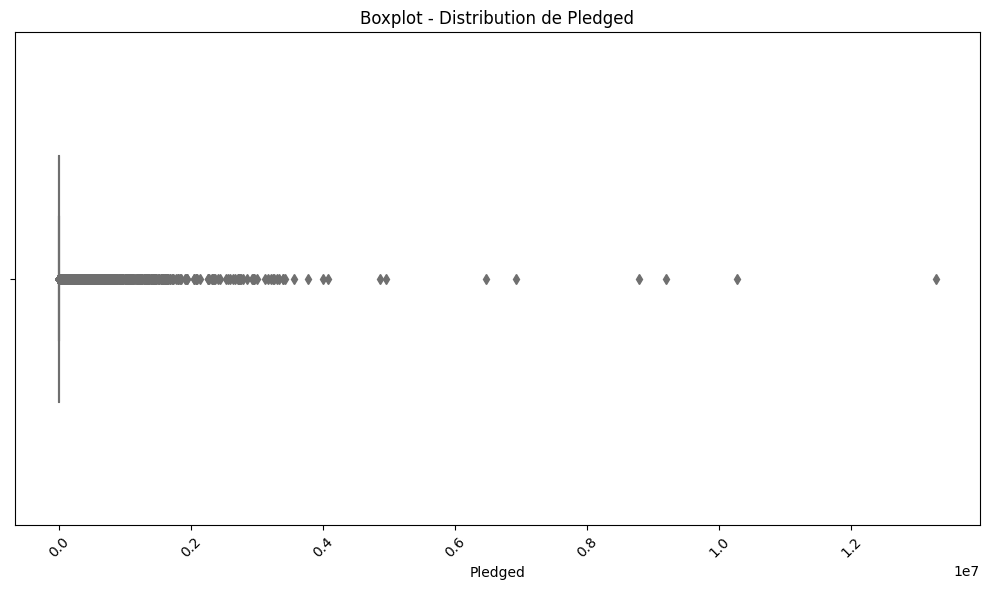

In [139]:
# Représentation du boxplot avant les transformations. 
data = df_clean_m['Pledged']
boxplot_num(data, 'Pledged')

In [140]:
# Appel de la fonction pour la colonne Pledged. 
nb_rows_to_delete('Pledged')

Nombre d'éléments à supprimer au percentile 75% : 80096
Nombre d'éléments à supprimer au percentile 80% : 64075
Nombre d'éléments à supprimer au percentile 85% : 48060
Nombre d'éléments à supprimer au percentile 90% : 32039
Nombre d'éléments à supprimer au percentile 95% : 16022
Nombre d'éléments à supprimer au percentile 99% : 3204


In [141]:
# Suppression des outliers qui sont hors du percentile sélectionné.
df_clean_m = df_clean_m[df_clean_m['Pledged'] <= stats_desc['99%']]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Volume de données restantes dans le Dataframe : 317169


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB


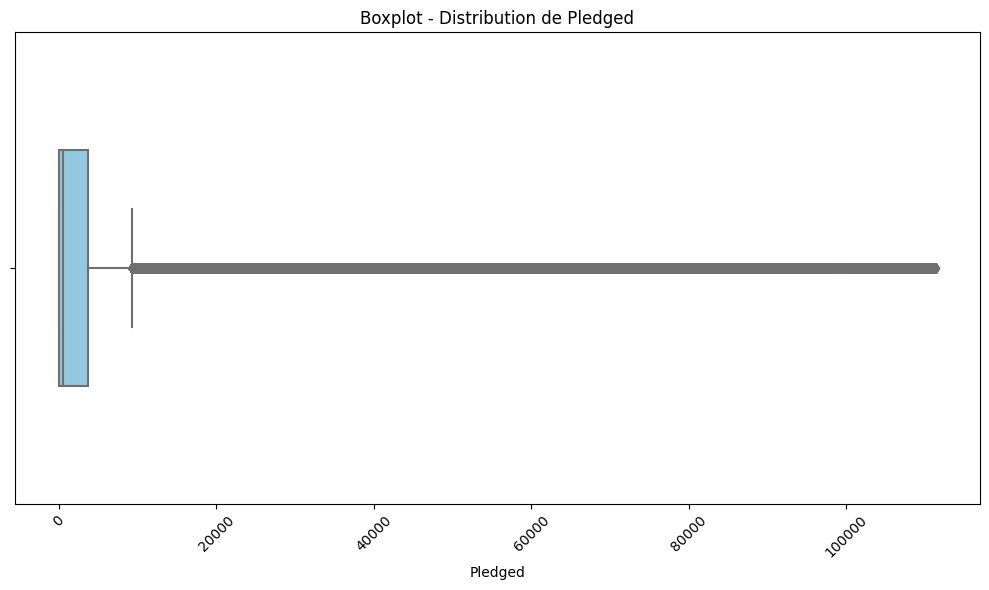

In [142]:
# Représentation du boxplot après les transformations. 
data = df_clean_m['Pledged']
boxplot_num(data, 'Pledged')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


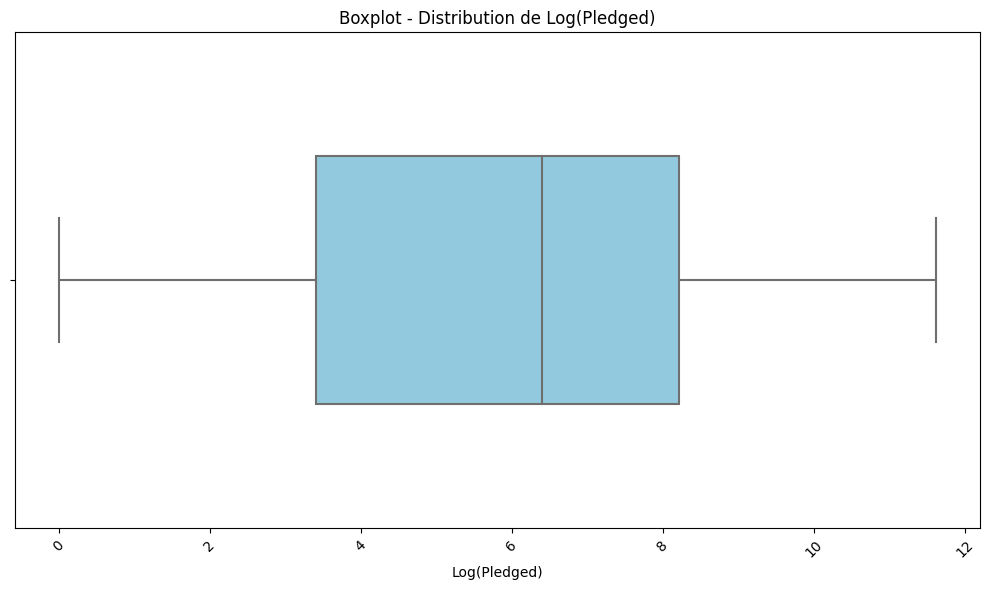

In [143]:
# Représentation du boxplot suivant les transformations (Log de la colonne Pledged)
data = np.log(df_clean_m['Pledged'])
boxplot_num(data, 'Log(Pledged)')

#### **Étape 5.9 : Traiter les valeurs manquantes et abérrantes pour la colonne State**

In [144]:
# Traitement des données manquantes et abérrantes pour la colonne State

# Crée une liste de states acceptées, à partir des données dans group_count.
list_states = ('failed','successful','canceled','live','undefined','suspended')

# Assigne le output de la fonction group_analysis à deux variables qu'on peut utiliser savoir quels index n'ont pas les states permis. 
group_count, indexes_to_remove = group_analysis(df_clean_m, 'State', 1, list_states)

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(indexes_to_remove)}")

# Supprime les observations dont la variable State n'est pas dans une catégorie principale admise.
df_clean_m = df_clean_m.drop(indexes_to_remove)

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 0
Volume de données restantes dans le Dataframe : 317169


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB


In [145]:
# Représentation des catégories restantes dans le Dataframe
df_clean_m['State'].value_counts()

failed        166201
successful    110088
canceled       31592
live            4305
undefined       3562
suspended       1421
Name: State, dtype: int64

In [146]:
''' 
NOTE : Étant donné que les différentes classes, autres que succès ou échec, sont peu volumineuses dans la base de données et que nous 
voulons ultimement fournir des insights qui favorisent le succès des campagnes, il est pertinent de grouper le tout dans une colonne
binaire, succès.
'''

df_clean_m['Success'] = df_clean_m['State'].apply(lambda x: 1 if x == 'successful' else 0)
df_clean_m.drop(columns='State', inplace=True)

#### **Étape 5.10 : Traiter les valeurs manquantes et abérrantes pour la colonne Backers**

In [147]:
# Traitement des données manquantes et abérrantes pour la colonne Backers.

# Présente les statistiques descriptives de la colonne Goal.
stats_desc = df_clean_m['Backers'].describe(percentiles=custom_percentiles)
stats_desc

count   317169.00
mean        64.04
std        190.14
min          0.00
5%           0.00
10%          0.00
15%          0.00
20%          1.00
25%          2.00
50%         12.00
75%         53.00
80%         70.00
85%         97.00
90%        146.00
95%        269.00
99%        850.32
max      11281.00
Name: Backers, dtype: float64

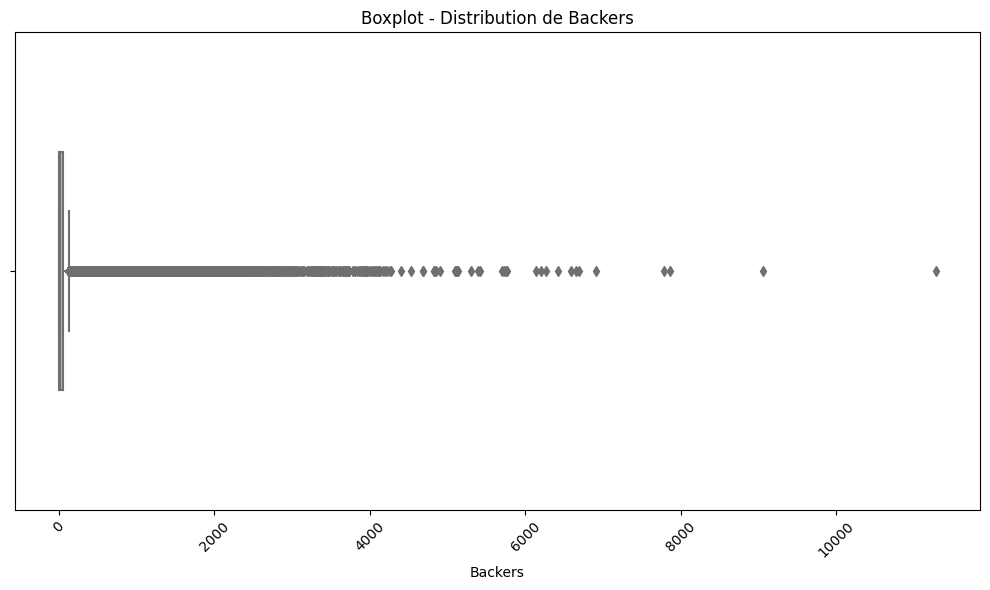

In [148]:
# Représentation du boxplot avant les transformations. 
data = df_clean_m['Backers']
boxplot_num(data, 'Backers')

In [149]:
# Appel de la fonction pour la colonne Backers. 
nb_rows_to_delete('Backers')

Nombre d'éléments à supprimer au percentile 75% : 79464
Nombre d'éléments à supprimer au percentile 80% : 64023
Nombre d'éléments à supprimer au percentile 85% : 47924
Nombre d'éléments à supprimer au percentile 90% : 31871
Nombre d'éléments à supprimer au percentile 95% : 15891
Nombre d'éléments à supprimer au percentile 99% : 3172


In [150]:
# Suppression des outliers qui sont hors du percentile sélectionné.
df_clean_m = df_clean_m[df_clean_m['Backers'] <= stats_desc['99%']]

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Volume de données restantes dans le Dataframe : 313997


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,Backers,Country,Success
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,0,GB,0


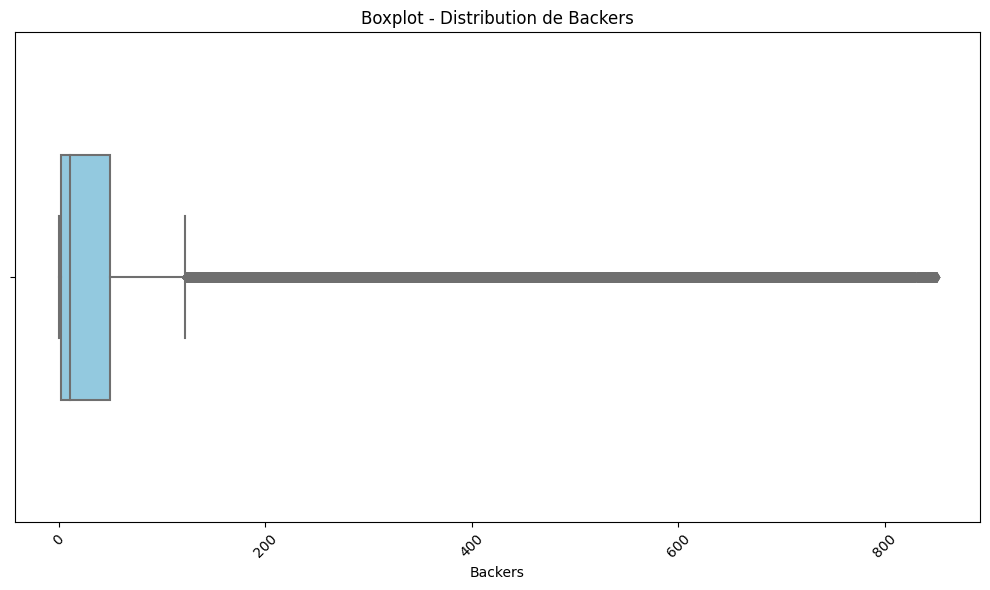

In [151]:
# Représentation du boxplot suivant les transformations. 
data = df_clean_m['Backers']
boxplot_num(data, 'Backers')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


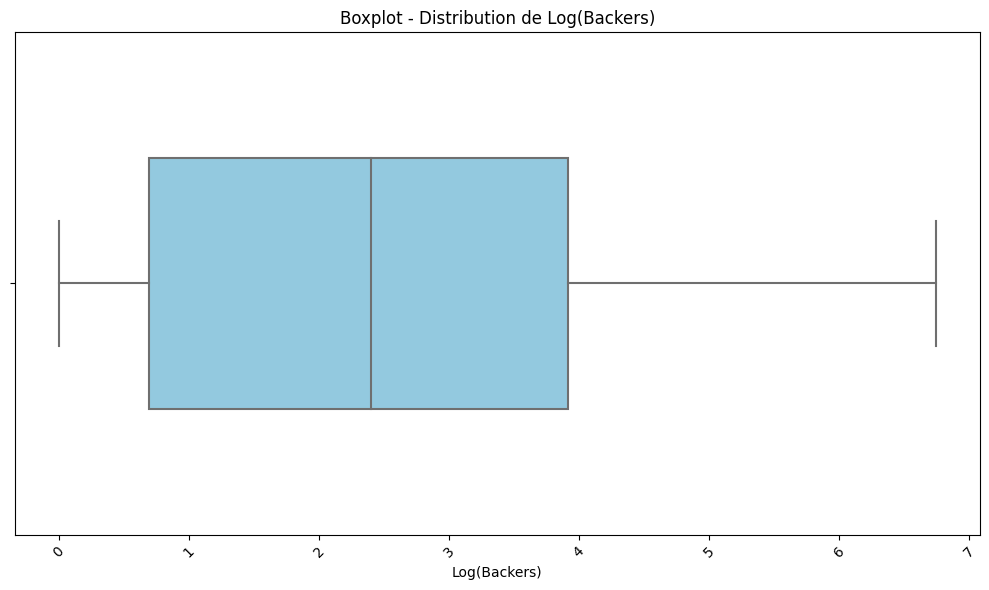

In [152]:
# Représentation du boxplot suivant les transformations (Log de la colonne Pledged)
data = np.log(df_clean_m['Backers'])
boxplot_num(data, 'Log(Backers)')

#### **Étape 5.11 : Traiter les valeurs manquantes et abérrantes pour la colonne Country**

In [153]:
# Traitement des données manquantes et abérrantes pour la colonne Country.

# Crée une liste de pays acceptées, à partir des données dans group_count.
list_countries = ('US','GB','CA','AU','DE','NL','FR','IT','ES','SE','NZ','DK','IE','NO','CH','BE','AT','MX','SG','HK')

# Assigne le output de la fonction group_analysis à deux variables qu'on peut utiliser savoir quels index n'ont pas les states permis. 
group_count, indexes_to_remove = group_analysis(df_clean_m, 'Country', 1, list_countries)

# Indique combien d'observations sont impactées par le traitement.
print(f"Nombre d'observations impactées par le traitement : {len(indexes_to_remove)}")

# Supprime les observations dont la variable State n'est pas dans une catégorie principale admise.
df_clean_m = df_clean_m.drop(indexes_to_remove)

# Indique combien d'observations sont dans le Dataframe, après transformation.
print(f"Volume de données restantes dans le Dataframe : {len(df_clean_m)}")

df_clean_m.head(1)

Nombre d'observations impactées par le traitement : 233
Volume de données restantes dans le Dataframe : 313764


,ID,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,Backers,Country,Success
0,1000002330,the songs of adelaide abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.00,2015-08-11 12:12:28,0.00,0,GB,0


#### **Étape 5.12 : Enregistrement de la BD nettoyée**

In [154]:
# Appel de la fonction pour créer un file_path
file_path = get_file_path("Datasets", "ks_clean_data.csv")

# Enregistrement du dataset, pour reprendre dans 2_apprentissage_machine.ipynb.
df_clean_m.to_csv(file_path, index=False)

# **Étape 6 : Ajouter des sources de données externes pour enrichir les insights**

À ce stade, les données brutes ont été profilées, normalisées et nettoyées, nous pouvons donc essayer de trouver des données additionnelles qui auraient une incidence sur le taux de réussite des campagnes Kickstarter. Cependant, pour conserver la simplicité du projet et comme il s'agit d'un mandat fictif, nous ne le ferons pas. Il aurait été intéressant d'intégrer des données macro-économiques par exemple, car il est juste de croire qu'en période de santé économique, les individus sont plus prônes de supporter des campagnes sur des plateformes comme Kickstarter. 